# Customer Segmentation using K means clustering (UNSUPERVISED LEARNING)

## Analysis of Dataset

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv(r"D:\AI COURSE LAB\Mall_Customers.csv")


In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [49]:

# Check for Missing Values
print(df.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [50]:
df.shape


(200, 5)

In [21]:
X = df.iloc[:,[3,4]].values

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [64]:
# print(X)

In [52]:
# Check for Duplicates
print(f"Duplicated Rows: {df.duplicated().sum()}")


Duplicated Rows: 0


In [57]:
# Summary Statistics
print(df.describe())

           Gender         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean     0.560000   38.850000           60.560000               50.200000
std      0.497633   13.969007           26.264721               25.823522
min      0.000000   18.000000           15.000000                1.000000
25%      0.000000   28.750000           41.500000               34.750000
50%      1.000000   36.000000           61.500000               50.000000
75%      1.000000   49.000000           78.000000               73.000000
max      1.000000   70.000000          137.000000               99.000000


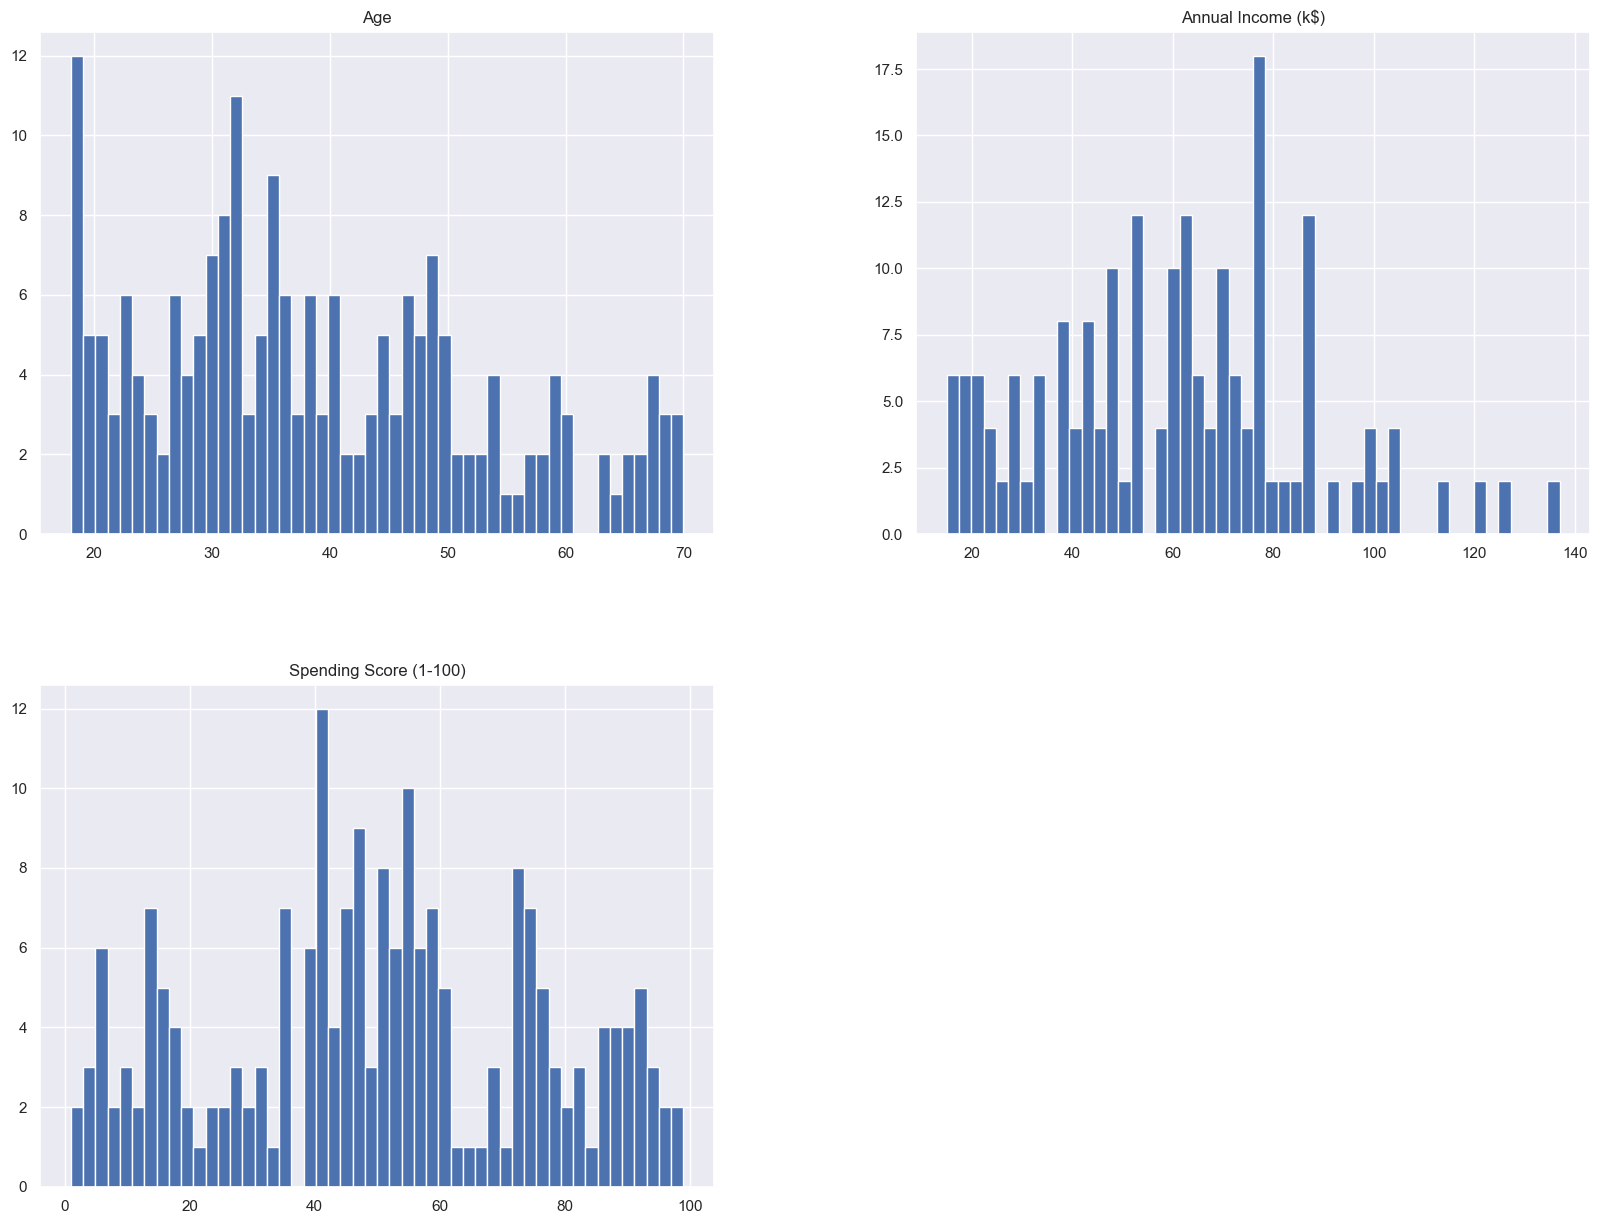

In [86]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [60]:
# # Dropping 'CustomerID' as it is not useful
# df.drop(columns=['CustomerID'], inplace=True)

In [65]:
# Convert Gender to Numerical (Optional for Correlation Analysis)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


# **Visualization**

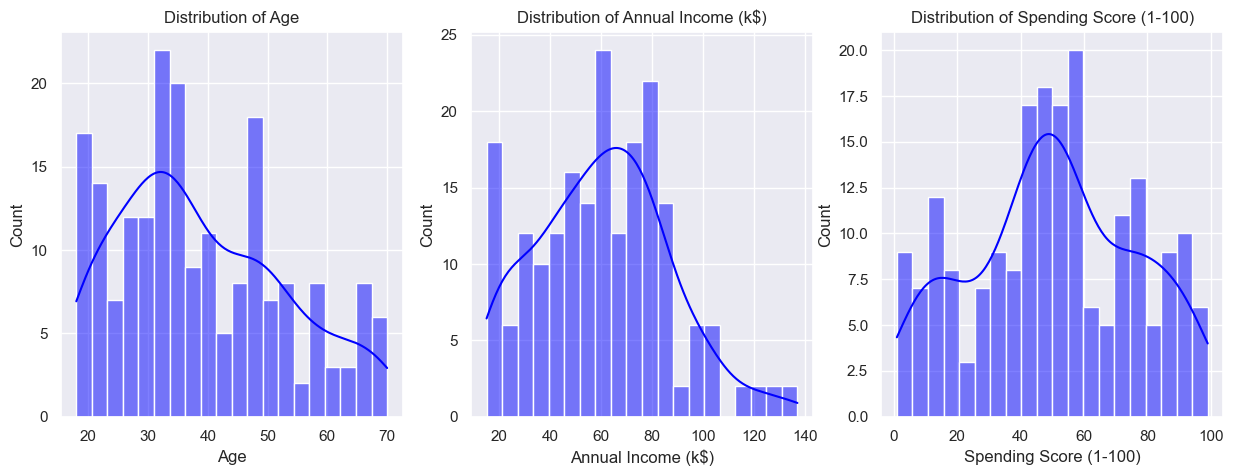

In [66]:
# Distribution of Age, Income & Spending Score
plt.figure(figsize=(15, 5))
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[feature], bins=20, kde=True, color="blue")
    plt.title(f"Distribution of {feature}")
plt.show()


In [79]:
df['Gender'] = df['Gender'].map({0: 'Male', 1: 'Female'})


In [31]:
corr_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
print(correlation_matrix)


                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


In [83]:
df.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,NaN,NaN,NaN,NaN
Age,NaN,1.000000,-0.012398,-0.327227
Annual Income (k$),NaN,-0.012398,1.000000,0.009903
Spending Score (1-100),NaN,-0.327227,0.009903,1.000000


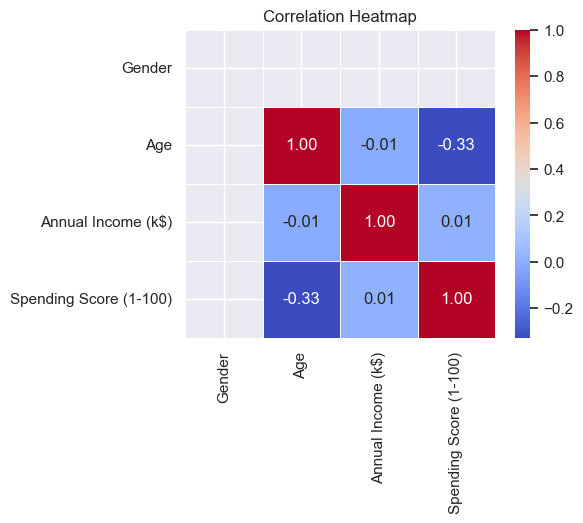

In [84]:
plt.figure(figsize=(5, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Elbow Method to find Optimal Number of K-Means

In [38]:
from sklearn.cluster import KMeans
wcss = []   #within cluster squared distance

In [39]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

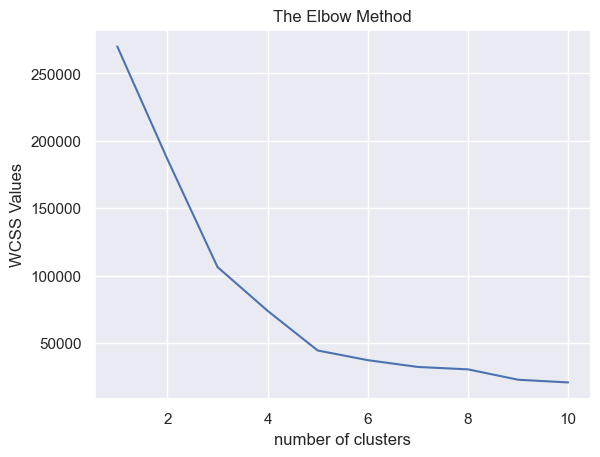

In [42]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("number of clusters")
plt.ylabel("WCSS Values")
plt.show()

### Optimal number of clusters are 5 , as the elbow appears at about 5 clusters

## Training the model using K-means clustering 

In [89]:
kmeans_model =KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)

In [92]:
y_kmeans = kmeans_model.fit_predict(X)


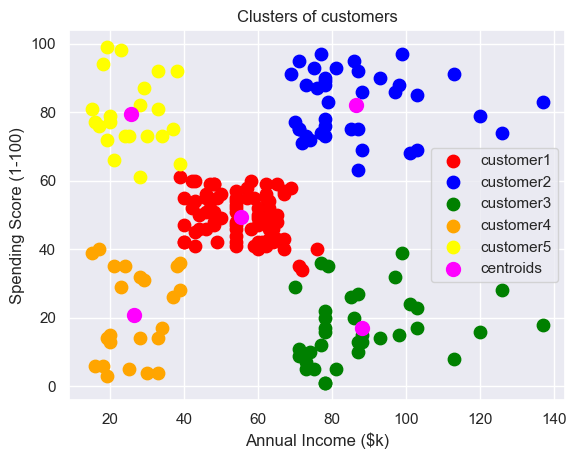

In [94]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1], s=80, c = 'red', label = 'customer1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1], s=80, c = 'blue', label = 'customer2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1], s=80, c = 'green', label = 'customer3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1], s=80, c = 'orange', label = 'customer4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1], s=80, c = 'yellow', label = 'customer5')

plt.scatter(kmeans_model.cluster_centers_[:,0],  kmeans_model.cluster_centers_[:,1], s=100, c = 'magenta', label = 'centroids')

plt.title("Clusters of customers")
plt.xlabel("Annual Income ($k)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

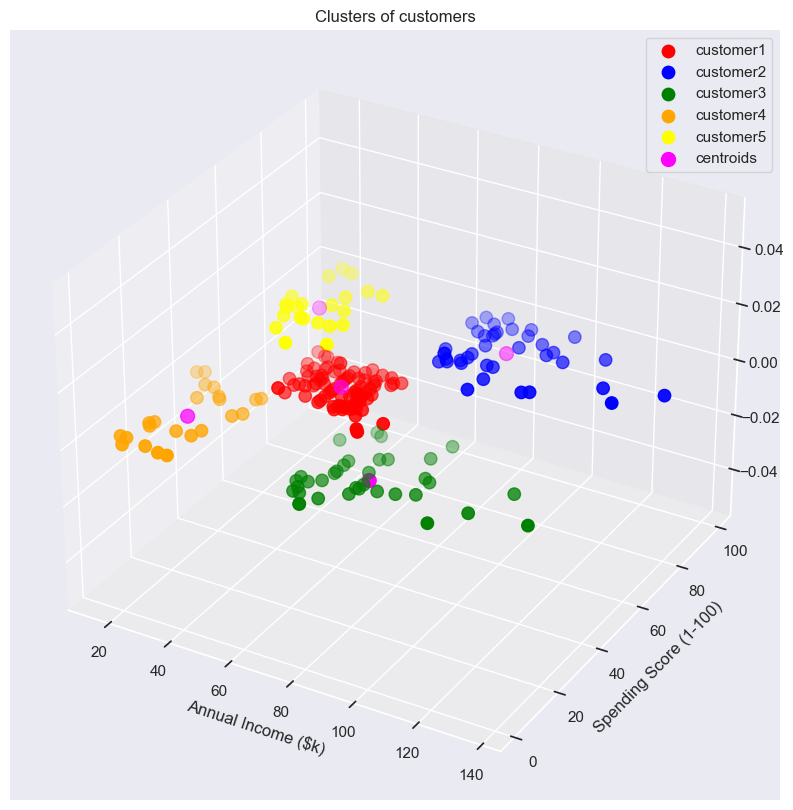

In [95]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1], s=80, c = 'red', label = 'customer1')
ax.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1], s=80, c = 'blue', label = 'customer2')
ax.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1], s=80, c = 'green', label = 'customer3')
ax.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1], s=80, c = 'orange', label = 'customer4')
ax.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1], s=80, c = 'yellow', label = 'customer5')

ax.scatter(kmeans_model.cluster_centers_[:,0],  kmeans_model.cluster_centers_[:,1], s=100, c = 'magenta', label = 'centroids')

plt.title("Clusters of customers")
plt.xlabel("Annual Income ($k)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


### *Customers in red cluster have high income and high spending , so the company should promote their products to this cluster of customers*

## **Interpretation from Clusters**

# Observations from the Clusters
# *Each color represents a different cluster, and the pink points are centroids.*

#### 1️⃣ *Red Cluster (Middle, Moderate Income & Spending Score)*
#### Customers with average income ($40k - $60k).
#### They have moderate spending scores (40-60).
#### Likely budget-conscious or stable customers who don’t overspend.

#### 2️⃣ *Blue Cluster (High Income, High Spending Score)*
#### Customers earning $70k-$140k with a high spending score (60-100).
#### Likely high-value customers who spend frequently.
#### Target group for premium services & luxury promotions.

#### 3️⃣ *Green Cluster (High Income, Low Spending Score)*
#### Customers with high income ($70k - $140k) but low spending score (0-40).
#### They can afford to spend but don’t.
#### Could be price-sensitive or savings-focused customers.
#### Opportunity for businesses to increase spending through incentives or personalized offers.

#### 4️⃣ *Yellow Cluster (Low Income, High Spending Score)*
#### Customers with low income ($0 - $40k) but high spending score (60-100).
#### These customers spend aggressively despite earning less.
#### Likely younger, trend-driven consumers who spend on non-essentials.
#### Businesses can retain them with discounts & loyalty programs.

#### 5️⃣ *Orange Cluster (Low Income, Low Spending Score)*
#### Customers with low income ($0 - $40k) and low spending score (0-40).
#### Likely budget-conscious or financially constrained customers.
#### Less priority for high-end marketing but can be targeted with affordable options.

